## collabotation overall score predictor

meeting number 13 predict

### 1. library import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_regression
from catboost import CatBoostRegressor

### 2. data load

In [3]:
df = pd.read_csv('data\dataset_collaboration_with_survey_scores.csv')
df

,id,project,meeting_number,speaker_number,speech_frequency,total_words,duration,normalized_speech_frequency,speaker_id,next_speaker_id,...,interaction_equality_index,degree_centrality,indegree_centrality,outdegree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,overall_collaboration_score,individual_collaboration_score
0,3_0_SPEAKER_00,3,1,0,22,8731,1.633333,13.469388,0,0,...,0.009704,0.000094,0.000047,0.000047,0.000000,9.518792e-08,0.000000,0.000003,-1.0,-1.0
1,3_0_SPEAKER_00,3,1,0,22,8731,1.633333,13.469388,0,1,...,0.009704,0.000094,0.000047,0.000047,0.000000,9.518792e-08,0.000000,0.000003,-1.0,-1.0
2,3_0_SPEAKER_00,3,1,0,22,8731,1.633333,13.469388,0,2,...,0.009704,0.000094,0.000047,0.000047,0.000000,9.518792e-08,0.000000,0.000003,-1.0,-1.0
3,3_0_SPEAKER_00,3,1,0,22,8731,1.633333,13.469388,0,3,...,0.009704,0.000094,0.000047,0.000047,0.000000,9.518792e-08,0.000000,0.000003,-1.0,-1.0
4,3_0_SPEAKER_01,3,1,1,645,8731,1.633333,394.897959,1,0,...,0.009704,0.166808,0.083381,0.083428,0.000051,9.523587e-08,0.000000,0.000030,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,4_13_SPEAKER_04,4,14,4,1143,10214,1.833333,623.454545,4,0,...,0.221733,0.098647,0.050815,0.047832,0.000000,5.670809e-07,0.000009,0.000005,NaN,-1.0
437,4_13_SPEAKER_04,4,14,4,1143,10214,1.833333,623.454545,4,1,...,0.221733,0.098647,0.050815,0.047832,0.000000,5.670809e-07,0.000009,0.000005,NaN,-1.0
438,4_13_SPEAKER_04,4,14,4,1143,10214,1.833333,623.454545,4,2,...,0.221733,0.098647,0.050815,0.047832,0.000000,5.670809e-07,0.000009,0.000005,NaN,-1.0
439,4_13_SPEAKER_04,4,14,4,1143,10214,1.833333,623.454545,4,3,...,0.221733,0.098647,0.050815,0.047832,0.000000,5.670809e-07,0.000009,0.000005,NaN,-1.0


In [6]:
# meeting_number 12 speaker05 delete & project 4 filter
df_filtered = df[(df['project'] == 4) & ~(df['speaker_id'] == 5) & ~(df['next_speaker_id'] == 5)]
df_filtered

,id,project,meeting_number,speaker_number,speech_frequency,total_words,duration,normalized_speech_frequency,speaker_id,next_speaker_id,...,interaction_equality_index,degree_centrality,indegree_centrality,outdegree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,overall_collaboration_score,individual_collaboration_score
80,4_0_SPEAKER_00,4,1,0,1294,12023,1.983333,652.436975,0,0,...,0.147041,0.098437,0.047005,0.051432,0.000022,9.955082e-07,0.000029,0.000013,3.0,4.0
81,4_0_SPEAKER_00,4,1,0,1294,12023,1.983333,652.436975,0,1,...,0.147041,0.098437,0.047005,0.051432,0.000022,9.955082e-07,0.000029,0.000013,3.0,3.0
82,4_0_SPEAKER_00,4,1,0,1294,12023,1.983333,652.436975,0,2,...,0.147041,0.098437,0.047005,0.051432,0.000022,9.955082e-07,0.000029,0.000013,3.0,3.0
83,4_0_SPEAKER_00,4,1,0,1294,12023,1.983333,652.436975,0,3,...,0.147041,0.098437,0.047005,0.051432,0.000022,9.955082e-07,0.000029,0.000013,3.0,6.0
84,4_0_SPEAKER_00,4,1,0,1294,12023,1.983333,652.436975,0,4,...,0.147041,0.098437,0.047005,0.051432,0.000022,9.955082e-07,0.000029,0.000013,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,4_13_SPEAKER_04,4,14,4,1143,10214,1.833333,623.454545,4,0,...,0.221733,0.098647,0.050815,0.047832,0.000000,5.670809e-07,0.000009,0.000005,NaN,-1.0
437,4_13_SPEAKER_04,4,14,4,1143,10214,1.833333,623.454545,4,1,...,0.221733,0.098647,0.050815,0.047832,0.000000,5.670809e-07,0.000009,0.000005,NaN,-1.0
438,4_13_SPEAKER_04,4,14,4,1143,10214,1.833333,623.454545,4,2,...,0.221733,0.098647,0.050815,0.047832,0.000000,5.670809e-07,0.000009,0.000005,NaN,-1.0
439,4_13_SPEAKER_04,4,14,4,1143,10214,1.833333,623.454545,4,3,...,0.221733,0.098647,0.050815,0.047832,0.000000,5.670809e-07,0.000009,0.000005,NaN,-1.0


In [7]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, 80 to 440
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              350 non-null    object 
 1   project                         350 non-null    int64  
 2   meeting_number                  350 non-null    int64  
 3   speaker_number                  350 non-null    int64  
 4   speech_frequency                350 non-null    int64  
 5   total_words                     350 non-null    int64  
 6   duration                        350 non-null    float64
 7   normalized_speech_frequency     350 non-null    float64
 8   speaker_id                      350 non-null    int64  
 9   next_speaker_id                 350 non-null    int64  
 10  count                           350 non-null    int64  
 11  network_density                 350 non-null    float64
 12  weighted_network_density        350 non-

### 3. data split

In [8]:
df_filtered.columns

Index(['id', 'project', 'meeting_number', 'speaker_number', 'speech_frequency',
       'total_words', 'duration', 'normalized_speech_frequency', 'speaker_id',
       'next_speaker_id', 'count', 'network_density',
       'weighted_network_density', 'gini_coefficient',
       'interaction_equality_index', 'degree_centrality',
       'indegree_centrality', 'outdegree_centrality', 'betweenness_centrality',
       'closeness_centrality', 'eigenvector_centrality', 'pagerank',
       'overall_collaboration_score', 'individual_collaboration_score'],
      dtype='object')

In [9]:
# 중복 제거 및 필요한 특성과 타겟 변수 선택
df_unique = df_filtered.drop_duplicates(subset=['meeting_number', 'speaker_number'])
df_unique

,id,project,meeting_number,speaker_number,speech_frequency,total_words,duration,normalized_speech_frequency,speaker_id,next_speaker_id,...,interaction_equality_index,degree_centrality,indegree_centrality,outdegree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,overall_collaboration_score,individual_collaboration_score
80,4_0_SPEAKER_00,4,1,0,1294,12023,1.983333,652.436975,0,0,...,0.147041,0.098437,0.047005,0.051432,0.000022,9.955082e-07,2.854199e-05,1.293119e-05,3.0,4.0
85,4_0_SPEAKER_01,4,1,1,711,12023,1.983333,358.487395,1,0,...,0.147041,0.013715,0.006489,0.007227,0.000011,1.094421e-06,3.915362e-06,2.924596e-06,2.0,3.0
90,4_0_SPEAKER_02,4,1,2,600,12023,1.983333,302.521008,2,0,...,0.147041,0.014887,0.008789,0.006098,0.000018,1.087450e-06,5.395933e-06,3.447128e-06,3.0,4.0
95,4_0_SPEAKER_03,4,1,3,8844,12023,1.983333,4459.159664,3,0,...,0.147041,0.141710,0.072157,0.069553,0.000000,3.286423e-07,3.090982e-05,2.002572e-05,3.0,3.0
100,4_0_SPEAKER_04,4,1,4,574,12023,1.983333,289.411765,4,0,...,0.147041,0.020269,0.010069,0.010200,0.000000,5.897397e-07,6.166603e-06,3.712453e-06,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,4_13_SPEAKER_00,4,14,0,799,10214,1.833333,435.818182,0,0,...,0.221733,0.019289,0.009892,0.009396,0.000002,8.821258e-07,1.805430e-06,1.189414e-06,NaN,-1.0
421,4_13_SPEAKER_01,4,14,1,439,10214,1.833333,239.454545,1,0,...,0.221733,0.001786,0.000850,0.000935,0.000010,6.953985e-07,1.386614e-07,4.613124e-07,NaN,-1.0
426,4_13_SPEAKER_02,4,14,2,585,10214,1.833333,319.090909,2,0,...,0.221733,0.009552,0.004578,0.004974,0.000000,8.582846e-07,8.299759e-07,7.617138e-07,NaN,-1.0
431,4_13_SPEAKER_03,4,14,3,7248,10214,1.833333,3953.454545,3,0,...,0.221733,0.124639,0.060821,0.063818,0.000000,1.828591e-07,9.009446e-06,6.049137e-06,NaN,-1.0


In [19]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 80 to 436
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              70 non-null     object 
 1   project                         70 non-null     int64  
 2   meeting_number                  70 non-null     int64  
 3   speaker_number                  70 non-null     int64  
 4   speech_frequency                70 non-null     int64  
 5   total_words                     70 non-null     int64  
 6   duration                        70 non-null     float64
 7   normalized_speech_frequency     70 non-null     float64
 8   speaker_id                      70 non-null     int64  
 9   next_speaker_id                 70 non-null     int64  
 10  count                           70 non-null     int64  
 11  network_density                 70 non-null     float64
 12  weighted_network_density        70 non-nu

In [20]:
# 모든 특성을 사용
features = ['project', 'meeting_number', 'speaker_number', 'speech_frequency',
       'total_words', 'duration', 'normalized_speech_frequency', 'speaker_id',
       'next_speaker_id', 'count', 'network_density',
       'weighted_network_density', 'gini_coefficient',
       'interaction_equality_index', 'degree_centrality',
       'indegree_centrality', 'outdegree_centrality', 'betweenness_centrality',
       'closeness_centrality', 'eigenvector_centrality', 'pagerank','individual_collaboration_score']
target = 'overall_collaboration_score'

In [21]:
# 특성과 타겟 분리
X = df_unique[features]
y = df_unique[target]
X

,project,meeting_number,speaker_number,speech_frequency,total_words,duration,normalized_speech_frequency,speaker_id,next_speaker_id,count,...,gini_coefficient,interaction_equality_index,degree_centrality,indegree_centrality,outdegree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,individual_collaboration_score
80,4,1,0,1294,12023,1.983333,652.436975,0,0,1,...,0.401351,0.147041,0.098437,0.047005,0.051432,0.000022,9.955082e-07,2.854199e-05,1.293119e-05,4.0
85,4,1,1,711,12023,1.983333,358.487395,1,0,3,...,0.401351,0.147041,0.013715,0.006489,0.007227,0.000011,1.094421e-06,3.915362e-06,2.924596e-06,3.0
90,4,1,2,600,12023,1.983333,302.521008,2,0,4,...,0.401351,0.147041,0.014887,0.008789,0.006098,0.000018,1.087450e-06,5.395933e-06,3.447128e-06,4.0
95,4,1,3,8844,12023,1.983333,4459.159664,3,0,46,...,0.401351,0.147041,0.141710,0.072157,0.069553,0.000000,3.286423e-07,3.090982e-05,2.002572e-05,3.0
100,4,1,4,574,12023,1.983333,289.411765,4,0,5,...,0.401351,0.147041,0.020269,0.010069,0.010200,0.000000,5.897397e-07,6.166603e-06,3.712453e-06,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,4,14,0,799,10214,1.833333,435.818182,0,0,0,...,0.415748,0.221733,0.019289,0.009892,0.009396,0.000002,8.821258e-07,1.805430e-06,1.189414e-06,-1.0
421,4,14,1,439,10214,1.833333,239.454545,1,0,1,...,0.415748,0.221733,0.001786,0.000850,0.000935,0.000010,6.953985e-07,1.386614e-07,4.613124e-07,-1.0
426,4,14,2,585,10214,1.833333,319.090909,2,0,1,...,0.415748,0.221733,0.009552,0.004578,0.004974,0.000000,8.582846e-07,8.299759e-07,7.617138e-07,-1.0
431,4,14,3,7248,10214,1.833333,3953.454545,3,0,35,...,0.415748,0.221733,0.124639,0.060821,0.063818,0.000000,1.828591e-07,9.009446e-06,6.049137e-06,-1.0


In [22]:
# 데이터 인덱스 재설정
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

### 4. model

1. XGBoost

1.1 모든 feature 사용

In [23]:
# 데이터 분할 (train/validation/test)
train_mask = X['meeting_number'] <= 10
val_mask = (X['meeting_number'] > 10) & (X['meeting_number'] <= 12)
test_mask = X['meeting_number'] == 13

X_train_val = X[train_mask]
y_train_val = y[train_mask]
X_val = X[val_mask]
y_val = y[val_mask]
X_test = X[test_mask]
y_test = y[test_mask]

# KFold Cross-Validation 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 예측값 저장을 위한 DataFrame
predictions = pd.DataFrame(index=X_train_val.index, columns=['predicted_score'])

# 성능 지표 값을 저장할 리스트
mse_values = []
mae_values = []
r2_values = []

# 교차 검증 수행
for train_index, val_index in kf.split(X_train_val):
    X_train, X_val_split = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val_split = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # 데이터 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_split_scaled = scaler.transform(X_val_split)

    # 모델 학습
    model = XGBRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)

    # 검증 데이터 예측
    y_pred_val_split = model.predict(X_val_split_scaled)
    
    # 예측값 저장
    predictions.loc[X_train_val.iloc[val_index].index, 'predicted_score'] = y_pred_val_split

    # 성능 지표 계산
    mse = mean_squared_error(y_val_split, y_pred_val_split)
    mae = mean_absolute_error(y_val_split, y_pred_val_split)
    r2 = r2_score(y_val_split, y_pred_val_split)
    
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

    print(f"🔹 Fold results: MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")
 
# 전체 폴드의 평균 및 표준 편차 계산
mean_mse = np.mean(mse_values)
std_mse = np.std(mse_values)
mean_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
mean_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)

print("\n----------------------------------------")
print("\n📊 Cross-Validation Results:")
print(f"🔸 Mean MSE: {mean_mse:.4f} ± {std_mse:.4f}")
print(f"🔸 Mean MAE: {mean_mae:.4f} ± {std_mae:.4f}")
print(f"🔸 Mean R2 Score: {mean_r2:.4f} ± {std_r2:.4f}")

# Validation 데이터에서 전체 평가
X_val_scaled = scaler.transform(X_val)
y_pred_val = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_pred_val)
val_mae = mean_absolute_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

print("\n----------------------------------------")
print("\n📉 Validation Set Results:")
print(f"🔸 Validation MSE: {val_mse:.4f}")
print(f"🔸 Validation MAE: {val_mae:.4f}")
print(f"🔸 Validation R2 Score: {val_r2:.4f}")

# 예측값 저장
predictions['meeting_number'] = X_train_val['meeting_number']
predictions['speaker_number'] = X_train_val['speaker_number']

print("\n----------------------------------------")
print("\n📝 Predictions:")
print(predictions)

🔹 Fold results: MSE: 2.1458, MAE: 1.1840, R2: 0.4293
🔹 Fold results: MSE: 0.5918, MAE: 0.6056, R2: 0.8790
🔹 Fold results: MSE: 1.6783, MAE: 0.9413, R2: 0.1608
🔹 Fold results: MSE: 1.6076, MAE: 0.9312, R2: 0.5643
🔹 Fold results: MSE: 0.9763, MAE: 0.8367, R2: 0.7535

----------------------------------------

📊 Cross-Validation Results:
🔸 Mean MSE: 1.4000 ± 0.5495
🔸 Mean MAE: 0.8998 ± 0.1866
🔸 Mean R2 Score: 0.5574 ± 0.2512

----------------------------------------

📉 Validation Set Results:
🔸 Validation MSE: 2.7145
🔸 Validation MAE: 1.3191
🔸 Validation R2 Score: -2.5717

----------------------------------------

📝 Predictions:
   predicted_score  meeting_number  speaker_number
0         3.085048               1               0
1         2.558471               1               1
2         2.391464               1               2
3         2.535264               1               3
4         2.292306               1               4
5         2.373551               2               0
6         

1.2 선별된 feature 사용

project                                NaN
meeting_number                    0.875130
speaker_number                   -0.097344
speech_frequency                  0.107798
total_words                       0.778535
duration                          0.745547
normalized_speech_frequency      -0.037023
speaker_id                       -0.097344
next_speaker_id                        NaN
count                             0.364397
network_density                   0.553863
weighted_network_density         -0.180481
gini_coefficient                 -0.299427
interaction_equality_index        0.359027
degree_centrality                -0.155332
indegree_centrality              -0.152322
outdegree_centrality             -0.157902
betweenness_centrality           -0.230727
closeness_centrality             -0.291475
eigenvector_centrality           -0.410200
pagerank                         -0.454012
individual_collaboration_score    0.855106
Name: overall_collaboration_score, dtype: float64


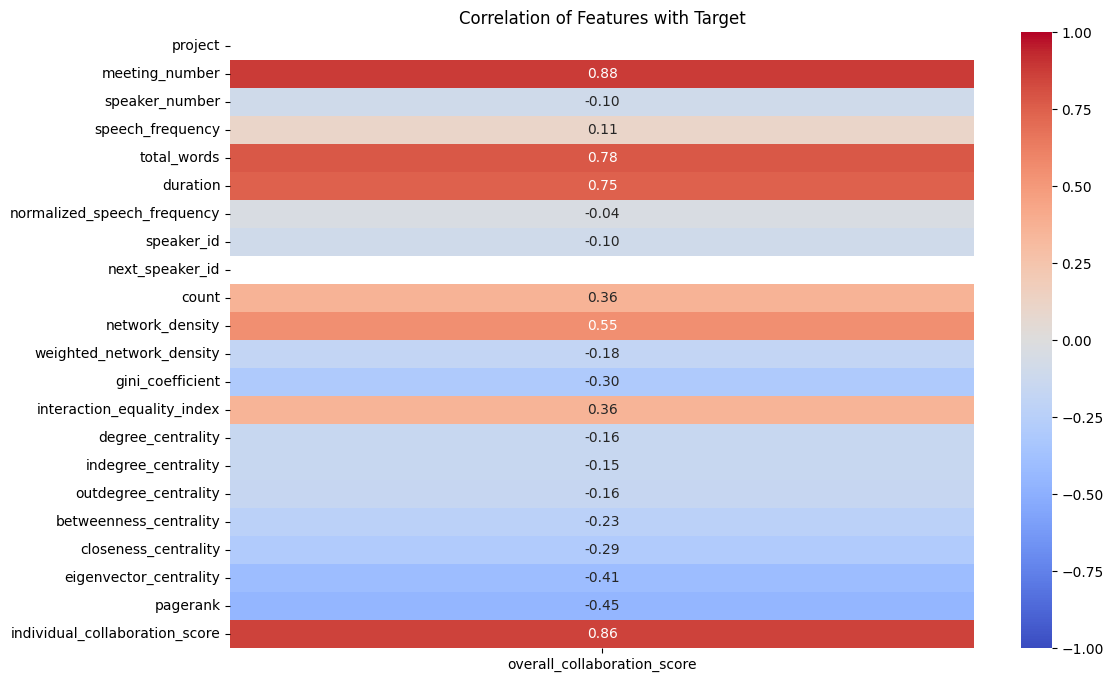

In [24]:
# 타겟과 모든 특성 간의 상관계수 계산
correlation_matrix = df_unique[features + [target]].corr()

# 타겟과의 상관계수만 추출
target_correlations = correlation_matrix[target].drop(target)

print(target_correlations)

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(target_correlations.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, fmt='.2f')
plt.title('Correlation of Features with Target')
plt.show()

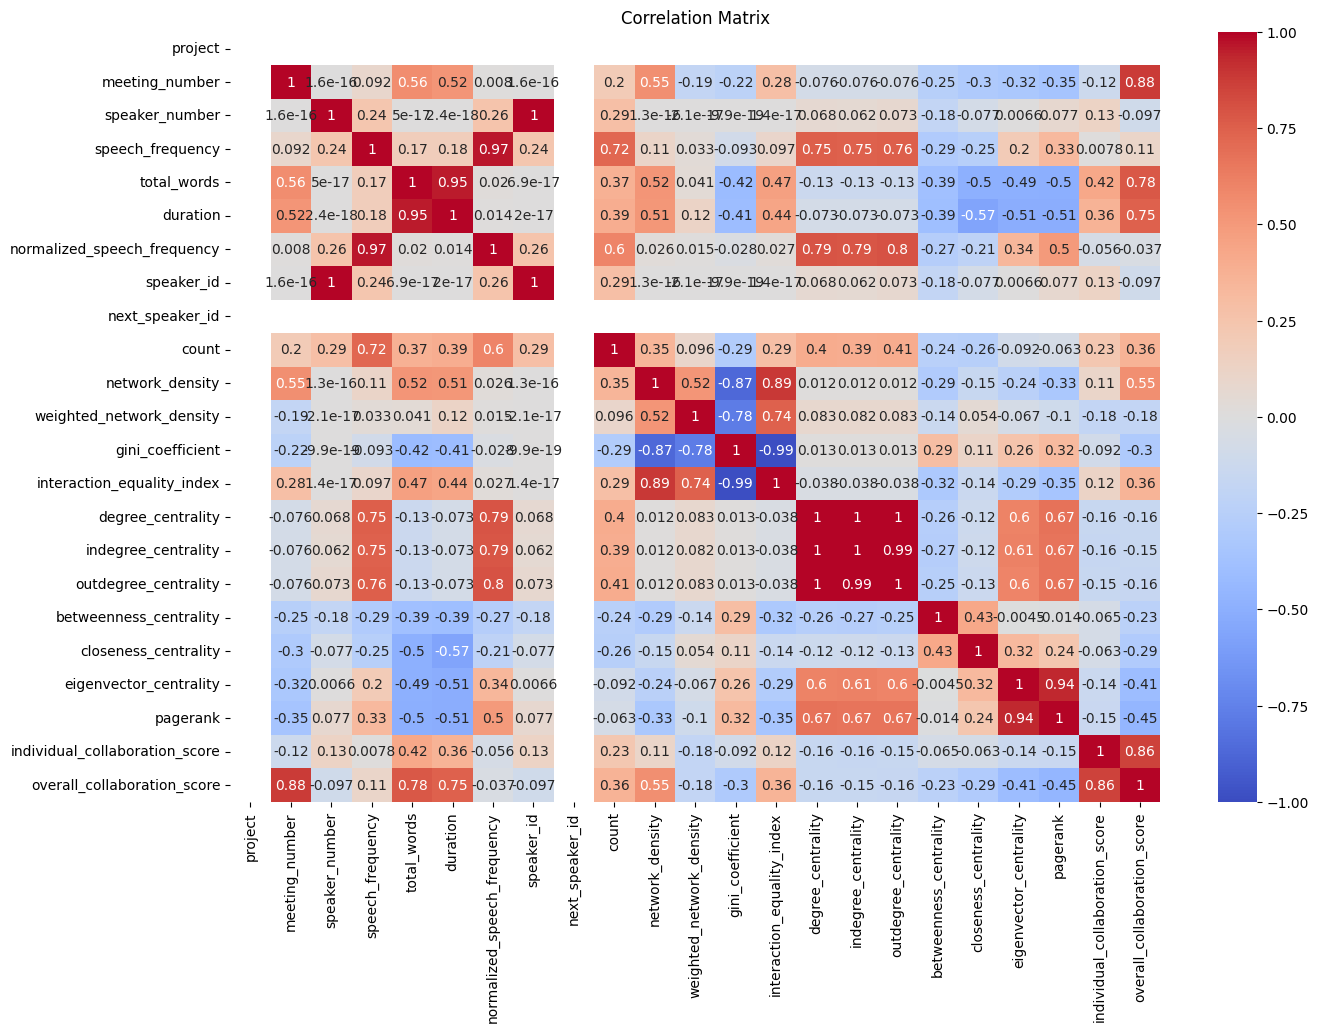

['project',
 'meeting_number',
 'speaker_number',
 'speech_frequency',
 'total_words',
 'duration',
 'normalized_speech_frequency',
 'speaker_id',
 'next_speaker_id',
 'count',
 'network_density',
 'weighted_network_density',
 'gini_coefficient',
 'interaction_equality_index',
 'degree_centrality',
 'indegree_centrality',
 'outdegree_centrality',
 'betweenness_centrality',
 'closeness_centrality',
 'eigenvector_centrality',
 'pagerank']

In [25]:
# 상관 계수 계산 및 시각화
correlation_matrix = df_unique[features + [target]].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# 타겟과의 상관계수가 높은 피처 제거
high_corr_threshold = 0.8
high_corr_features = correlation_matrix[target][abs(correlation_matrix[target]) >= high_corr_threshold].index.tolist()
high_corr_features.remove(target)  # 타겟 변수는 제거 대상에서 제외

# 상관계수가 높은 피처 중에서 'meeting_number'와 'speaker_number'를 제외한 피처 리스트
selected_features = [feature for feature in features if feature not in high_corr_features or feature in ['meeting_number', 'speaker_number']]
selected_features


In [30]:
# 데이터 분할 (train/validation/test)
train_mask = df_unique['meeting_number'] <= 10
val_mask = (df_unique['meeting_number'] > 10) & (df_unique['meeting_number'] <= 12)
test_mask = df_unique['meeting_number'] == 13

X_train_val = df_unique[train_mask][selected_features]
y_train_val = df_unique[train_mask][target]
X_val = df_unique[val_mask][selected_features]
y_val = df_unique[val_mask][target]
X_test = df_unique[test_mask][selected_features]
y_test = df_unique[test_mask][target]

# 중요한 피처 선택
k = 10
selector = SelectKBest(score_func=f_regression, k=k)
X_train_val_selected = selector.fit_transform(X_train_val, y_train_val)

# 선택된 피처의 이름
selected_feature_names = X_train_val.columns[selector.get_support()]
print("Selected features:", selected_feature_names)

# 선택된 피처로 Validation 데이터 준비
X_val_selected = X_val[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# 모델 학습 및 교차 검증
kf = KFold(n_splits=5, shuffle=True, random_state=42)
predictions = pd.DataFrame(index=X_train_val.index, columns=['predicted_score'])
mse_values = []

for train_index, val_index in kf.split(X_train_val_selected):
    X_train, X_val_split = X_train_val_selected[train_index], X_train_val_selected[val_index]
    y_train, y_val_split = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_split_scaled = scaler.transform(X_val_split)

    model = XGBRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)

    y_pred_val_split = model.predict(X_val_split_scaled)
    predictions.loc[X_train_val.iloc[val_index].index, 'predicted_score'] = y_pred_val_split

    # 성능 지표 계산
    mse = mean_squared_error(y_val_split, y_pred_val_split)
    mae = mean_absolute_error(y_val_split, y_pred_val_split)
    r2 = r2_score(y_val_split, y_pred_val_split)
    
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)
    print(f"🔹 Fold results: MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# 전체 폴드의 평균 및 표준 편차 계산
mean_mse = np.mean(mse_values)
std_mse = np.std(mse_values)
mean_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
mean_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)

print("\n----------------------------------------")
print("\n📊 Cross-Validation Results:")
print(f"🔸 Mean MSE: {mean_mse:.4f} ± {std_mse:.4f}")
print(f"🔸 Mean MAE: {mean_mae:.4f} ± {std_mae:.4f}")
print(f"🔸 Mean R2 Score: {mean_r2:.4f} ± {std_r2:.4f}")

# Validation 데이터에서 전체 평가
X_val_scaled = scaler.transform(X_val_selected)
y_pred_val = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)
val_mae = mean_absolute_error(y_val, y_pred_val)

print("\n----------------------------------------")
print("\n📉 Validation Set Results:")
print(f"🔸 Validation MSE: {val_mse:.4f}")
print(f"🔸 Validation MAE: {val_mae:.4f}")
print(f"🔸 Validation R2 Score: {val_r2:.4f}")

# 예측값 저장
predictions['meeting_number'] = X_train_val['meeting_number']
predictions['speaker_number'] = X_train_val['speaker_number']

print("\n----------------------------------------")
print("\n📝 Predictions:")
print(predictions)

Selected features: Index(['meeting_number', 'total_words', 'duration', 'count', 'network_density',
       'gini_coefficient', 'interaction_equality_index',
       'closeness_centrality', 'eigenvector_centrality', 'pagerank'],
      dtype='object')
🔹 Fold results: MSE: 2.5551, MAE: 1.2106, R2: 0.3205
🔹 Fold results: MSE: 0.6967, MAE: 0.6734, R2: 0.8575
🔹 Fold results: MSE: 1.3937, MAE: 0.8740, R2: 0.3032
🔹 Fold results: MSE: 1.8247, MAE: 1.1340, R2: 0.5055
🔹 Fold results: MSE: 0.8127, MAE: 0.6270, R2: 0.7948

----------------------------------------

📊 Cross-Validation Results:
🔸 Mean MSE: 1.4566 ± 0.6838
🔸 Mean MAE: 0.9273 ± 0.2245
🔸 Mean R2 Score: 0.5546 ± 0.2295

----------------------------------------

📉 Validation Set Results:
🔸 Validation MSE: 2.9180
🔸 Validation MAE: 1.3652
🔸 Validation R2 Score: -2.8394

----------------------------------------

📝 Predictions:
    predicted_score  meeting_number  speaker_number
80         2.397777               1               0
85         2.27

c:\Users\mkflo\.conda\envs\programmers\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1.3 최적의 파라미터 사용

In [31]:
# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9 ],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.4, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.4, 0.6, 0.8, 1.0]
}

# GridSearchCV 설정
grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# 데이터 스케일링
scaler = StandardScaler()
X_train_val_scaled = scaler.fit_transform(X_train_val)
X_val_scaled = scaler.transform(X_val)

# 그리드 서치 수행
grid_search.fit(X_train_val_scaled, y_train_val)

# 최적 하이퍼파라미터 출력
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV MSE: {-grid_search.best_score_}")

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.4}
Best CV MSE: 1.5318403043492435


피처 선택 + 최적 파라미터

In [34]:
# 데이터 분할 (train/validation/test)
train_mask = df_unique['meeting_number'] <= 10
val_mask = (df_unique['meeting_number'] > 10) & (df_unique['meeting_number'] <= 12)
test_mask = df_unique['meeting_number'] == 13

X_train_val = df_unique[train_mask][selected_features]
y_train_val = df_unique[train_mask][target]
X_val = df_unique[val_mask][selected_features]
y_val = df_unique[val_mask][target]
X_test = df_unique[test_mask][selected_features]
y_test = df_unique[test_mask][target]

# 중요한 피처 선택
k = 10
selector = SelectKBest(score_func=f_regression, k=k)
X_train_val_selected = selector.fit_transform(X_train_val, y_train_val)

# 선택된 피처의 이름
selected_feature_names = X_train_val.columns[selector.get_support()]
print("Selected features:", selected_feature_names)

# 선택된 피처로 Validation 데이터 준비
X_val_selected = X_val[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# 모델 학습 및 교차 검증
kf = KFold(n_splits=5, shuffle=True, random_state=42)
predictions = pd.DataFrame(index=X_train_val.index, columns=['predicted_score'])

# 최적의 하이퍼파라미터 설정
best_params = {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.4}

for train_index, val_index in kf.split(X_train_val_selected):
    X_train, X_val_split = X_train_val_selected[train_index], X_train_val_selected[val_index]
    y_train, y_val_split = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_split_scaled = scaler.transform(X_val_split)

    model = XGBRegressor(**best_params)
    model.fit(X_train_scaled, y_train)

    y_pred_val_split = model.predict(X_val_split_scaled)
    predictions.loc[X_train_val.iloc[val_index].index, 'predicted_score'] = y_pred_val_split

    # 성능 지표 계산
    mse = mean_squared_error(y_val_split, y_pred_val_split)
    mae = mean_absolute_error(y_val_split, y_pred_val_split)
    r2 = r2_score(y_val_split, y_pred_val_split)
    
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)
    print(f"🔹 Fold results: MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# 전체 폴드의 평균 및 표준 편차 계산
mean_mse = np.mean(mse_values)
std_mse = np.std(mse_values)
mean_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
mean_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)

print("\n----------------------------------------")
print("\n📊 Cross-Validation Results:")
print(f"🔸 Mean MSE: {mean_mse:.4f} ± {std_mse:.4f}")
print(f"🔸 Mean MAE: {mean_mae:.4f} ± {std_mae:.4f}")
print(f"🔸 Mean R2 Score: {mean_r2:.4f} ± {std_r2:.4f}")

# Validation 데이터에서 전체 평가
X_val_scaled = scaler.transform(X_val_selected)
y_pred_val = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)
val_mae = mean_absolute_error(y_val, y_pred_val)

print("\n----------------------------------------")
print("\n📉 Validation Set Results:")
print(f"🔸 Validation MSE: {val_mse:.4f}")
print(f"🔸 Validation MAE: {val_mae:.4f}")
print(f"🔸 Validation R2 Score: {val_r2:.4f}")

# 예측값 저장
predictions['meeting_number'] = X_train_val['meeting_number']
predictions['speaker_number'] = X_train_val['speaker_number']

print("\n----------------------------------------")
print("\n📝 Predictions:")
print(predictions)


# # 데이터 분할 (train/validation/test)
# train_mask = X['meeting_number'] <= 10
# val_mask = (X['meeting_number'] > 10) & (X['meeting_number'] <= 12)
# test_mask = X['meeting_number'] == 13

# X_train_val = X[train_mask]
# y_train_val = y[train_mask]
# X_val = X[val_mask]
# y_val = y[val_mask]
# X_test = X[test_mask]
# y_test = y[test_mask]

# # 성능 지표 값을 저장할 리스트
# mse_values = []
# mae_values = []
# r2_values = []


# # 최적의 하이퍼파라미터 설정
# best_params = {
#     'colsample_bytree': 0.4, 
#     'learning_rate': 0.1, 
#     'max_depth': 5, 
#     'n_estimators': 300, 
#     'subsample': 0.6
#     }

# # KFold Cross-Validation 설정
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # 예측값 저장을 위한 DataFrame
# predictions = pd.DataFrame(index=X_train_val.index, columns=['predicted_score'])

# # MSE 값을 저장할 리스트
# mse_values = []

# # 교차 검증 수행
# for train_index, val_index in kf.split(X_train_val):
#     X_train, X_val_split = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
#     y_train, y_val_split = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

#     # 데이터 스케일링
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_val_split_scaled = scaler.transform(X_val_split)

#     # 모델 학습
#     model = XGBRegressor(**best_params)
#     model.fit(X_train_scaled, y_train)

#     # 검증 데이터 예측
#     y_pred_val_split = model.predict(X_val_split_scaled)

#     # 예측값 저장
#     predictions.loc[X_train_val.iloc[val_index].index, 'predicted_score'] = y_pred_val_split

#     # 성능 지표 계산
#     mse = mean_squared_error(y_val_split, y_pred_val_split)
#     mae = mean_absolute_error(y_val_split, y_pred_val_split)
#     r2 = r2_score(y_val_split, y_pred_val_split)
    
#     mse_values.append(mse)
#     mae_values.append(mae)
#     r2_values.append(r2)

#     print(f"🔹 Fold results: MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# # 전체 폴드의 평균 및 표준 편차 계산
# mean_mse = np.mean(mse_values)
# std_mse = np.std(mse_values)
# mean_mae = np.mean(mae_values)
# std_mae = np.std(mae_values)
# mean_r2 = np.mean(r2_values)
# std_r2 = np.std(r2_values)

# print("\n----------------------------------------")
# print("\n📊 Cross-Validation Results:")
# print(f"🔸 Mean MSE: {mean_mse:.4f} ± {std_mse:.4f}")
# print(f"🔸 Mean MAE: {mean_mae:.4f} ± {std_mae:.4f}")
# print(f"🔸 Mean R2 Score: {mean_r2:.4f} ± {std_r2:.4f}")

# # Validation 데이터에서 전체 평가
# X_val_scaled = scaler.transform(X_val)
# y_pred_val = model.predict(X_val_scaled)
# val_mse = mean_squared_error(y_val, y_pred_val)
# val_mae = mean_absolute_error(y_val, y_pred_val)
# val_r2 = r2_score(y_val, y_pred_val)

# print("\n----------------------------------------")
# print("\n📉 Validation Set Results:")
# print(f"🔸 Validation MSE: {val_mse:.4f}")
# print(f"🔸 Validation MAE: {val_mae:.4f}")
# print(f"🔸 Validation R2 Score: {val_r2:.4f}")

# # 예측값 저장
# predictions['meeting_number'] = X_train_val['meeting_number']
# predictions['speaker_number'] = X_train_val['speaker_number']

# print("\n----------------------------------------")
# print("\n📝 Predictions:")
# print(predictions)

Selected features: Index(['meeting_number', 'total_words', 'duration', 'count', 'network_density',
       'gini_coefficient', 'interaction_equality_index',
       'closeness_centrality', 'eigenvector_centrality', 'pagerank'],
      dtype='object')
🔹 Fold results: MSE: 1.9688, MAE: 1.1480, R2: 0.4764
🔹 Fold results: MSE: 0.5659, MAE: 0.6407, R2: 0.8843
🔹 Fold results: MSE: 1.4201, MAE: 0.8088, R2: 0.2899
🔹 Fold results: MSE: 1.0072, MAE: 0.8318, R2: 0.7271
🔹 Fold results: MSE: 1.0342, MAE: 0.8135, R2: 0.7388

----------------------------------------

📊 Cross-Validation Results:
🔸 Mean MSE: 1.1120 ± 0.5171
🔸 Mean MAE: 0.8319 ± 0.2057
🔸 Mean R2 Score: 0.6567 ± 0.1961

----------------------------------------

📉 Validation Set Results:
🔸 Validation MSE: 2.4225
🔸 Validation MAE: 1.1353
🔸 Validation R2 Score: -2.1876

----------------------------------------

📝 Predictions:
    predicted_score  meeting_number  speaker_number
80         3.128056               1               0
85         2.19

c:\Users\mkflo\.conda\envs\programmers\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


전체 피처 + 최적 파라미터

In [35]:
# 데이터 분할 (train/validation/test)
train_mask = X['meeting_number'] <= 10
val_mask = (X['meeting_number'] > 10) & (X['meeting_number'] <= 12)
test_mask = X['meeting_number'] == 13

X_train_val = X[train_mask]
y_train_val = y[train_mask]
X_val = X[val_mask]
y_val = y[val_mask]
X_test = X[test_mask]
y_test = y[test_mask]

# 성능 지표 값을 저장할 리스트
mse_values = []
mae_values = []
r2_values = []


# 최적의 하이퍼파라미터 설정
best_params = {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.4}

# KFold Cross-Validation 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 예측값 저장을 위한 DataFrame
predictions = pd.DataFrame(index=X_train_val.index, columns=['predicted_score'])

# MSE 값을 저장할 리스트
mse_values = []

# 교차 검증 수행
for train_index, val_index in kf.split(X_train_val):
    X_train, X_val_split = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val_split = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # 데이터 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_split_scaled = scaler.transform(X_val_split)

    # 모델 학습
    model = XGBRegressor(**best_params)
    model.fit(X_train_scaled, y_train)

    # 검증 데이터 예측
    y_pred_val_split = model.predict(X_val_split_scaled)

    # 예측값 저장
    predictions.loc[X_train_val.iloc[val_index].index, 'predicted_score'] = y_pred_val_split

    # 성능 지표 계산
    mse = mean_squared_error(y_val_split, y_pred_val_split)
    mae = mean_absolute_error(y_val_split, y_pred_val_split)
    r2 = r2_score(y_val_split, y_pred_val_split)
    
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

    print(f"🔹 Fold results: MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# 전체 폴드의 평균 및 표준 편차 계산
mean_mse = np.mean(mse_values)
std_mse = np.std(mse_values)
mean_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
mean_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)

print("\n----------------------------------------")
print("\n📊 Cross-Validation Results:")
print(f"🔸 Mean MSE: {mean_mse:.4f} ± {std_mse:.4f}")
print(f"🔸 Mean MAE: {mean_mae:.4f} ± {std_mae:.4f}")
print(f"🔸 Mean R2 Score: {mean_r2:.4f} ± {std_r2:.4f}")

# Validation 데이터에서 전체 평가
X_val_scaled = scaler.transform(X_val)
y_pred_val = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_pred_val)
val_mae = mean_absolute_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

print("\n----------------------------------------")
print("\n📉 Validation Set Results:")
print(f"🔸 Validation MSE: {val_mse:.4f}")
print(f"🔸 Validation MAE: {val_mae:.4f}")
print(f"🔸 Validation R2 Score: {val_r2:.4f}")

# 예측값 저장
predictions['meeting_number'] = X_train_val['meeting_number']
predictions['speaker_number'] = X_train_val['speaker_number']

print("\n----------------------------------------")
print("\n📝 Predictions:")
print(predictions)

🔹 Fold results: MSE: 1.2885, MAE: 0.8684, R2: 0.6573
🔹 Fold results: MSE: 0.2139, MAE: 0.3567, R2: 0.9563
🔹 Fold results: MSE: 0.8896, MAE: 0.7686, R2: 0.5552
🔹 Fold results: MSE: 0.5277, MAE: 0.6745, R2: 0.8570
🔹 Fold results: MSE: 0.9999, MAE: 0.8458, R2: 0.7475

----------------------------------------

📊 Cross-Validation Results:
🔸 Mean MSE: 0.7839 ± 0.3750
🔸 Mean MAE: 0.7028 ± 0.1859
🔸 Mean R2 Score: 0.7547 ± 0.1417

----------------------------------------

📉 Validation Set Results:
🔸 Validation MSE: 2.2292
🔸 Validation MAE: 1.1454
🔸 Validation R2 Score: -1.9332

----------------------------------------

📝 Predictions:
   predicted_score  meeting_number  speaker_number
0         4.448987               1               0
1         2.965884               1               1
2         2.795848               1               2
3         2.576254               1               3
4         2.122053               1               4
5         2.881495               2               0
6         

2) Catboost

2.1 모든 feature 사용

In [19]:
# 데이터 분할 (train/validation/test)
train_mask = X['meeting_number'] <= 10
val_mask = (X['meeting_number'] > 10) & (X['meeting_number'] <= 12)
test_mask = X['meeting_number'] == 13

X_train_val = X[train_mask]
y_train_val = y[train_mask]
X_val = X[val_mask]
y_val = y[val_mask]
X_test = X[test_mask]
y_test = y[test_mask]

# KFold Cross-Validation 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 예측값 저장을 위한 DataFrame
predictions = pd.DataFrame(index=X_train_val.index, columns=['predicted_score'])

# 성능 지표 값을 저장할 리스트
mse_values = []
mae_values = []
r2_values = []

# 교차 검증 수행
for train_index, val_index in kf.split(X_train_val):
    X_train, X_val_split = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val_split = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # 데이터 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_split_scaled = scaler.transform(X_val_split)

    # 모델 학습
    model = CatBoostRegressor(random_state=42, verbose=0)
    model.fit(X_train_scaled, y_train)

    # 검증 데이터 예측
    y_pred_val_split = model.predict(X_val_split_scaled)
    
    # 예측값 저장
    predictions.loc[X_train_val.iloc[val_index].index, 'predicted_score'] = y_pred_val_split

    # 성능 지표 계산
    mse = mean_squared_error(y_val_split, y_pred_val_split)
    mae = mean_absolute_error(y_val_split, y_pred_val_split)
    r2 = r2_score(y_val_split, y_pred_val_split)
    
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

    print(f"🔹 Fold results: MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

    
# 전체 폴드의 평균 및 표준 편차 계산
mean_mse = np.mean(mse_values)
std_mse = np.std(mse_values)
mean_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
mean_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)

print("\n----------------------------------------")
print("\n📊 Cross-Validation Results:")
print(f"🔸 Mean MSE: {mean_mse:.4f} ± {std_mse:.4f}")
print(f"🔸 Mean MAE: {mean_mae:.4f} ± {std_mae:.4f}")
print(f"🔸 Mean R2 Score: {mean_r2:.4f} ± {std_r2:.4f}")

# Validation 데이터에서 전체 평가
X_val_scaled = scaler.transform(X_val)
y_pred_val = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_pred_val)
val_mae = mean_absolute_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

print("\n----------------------------------------")
print("\n📉 Validation Set Results:")
print(f"🔸 Validation MSE: {val_mse:.4f}")
print(f"🔸 Validation MAE: {val_mae:.4f}")
print(f"🔸 Validation R2 Score: {val_r2:.4f}")

# 예측값 저장
predictions['meeting_number'] = X_train_val['meeting_number']
predictions['speaker_number'] = X_train_val['speaker_number']

print("\n----------------------------------------")
print("\n📝 Predictions:")
print(predictions)

🔹 Fold results: MSE: 1.7975, MAE: 1.0698, R2: 0.8360
🔹 Fold results: MSE: 0.3908, MAE: 0.5531, R2: 0.9776
🔹 Fold results: MSE: 0.6650, MAE: 0.4569, R2: 0.9209
🔹 Fold results: MSE: 0.2791, MAE: 0.4636, R2: 0.9756
🔹 Fold results: MSE: 1.0181, MAE: 0.7923, R2: 0.9017

----------------------------------------

📊 Cross-Validation Results:
🔸 Mean MSE: 0.8301 ± 0.5468
🔸 Mean MAE: 0.6671 ± 0.2351
🔸 Mean R2 Score: 0.9224 ± 0.0525

----------------------------------------

📉 Validation Set Results:
🔸 Validation MSE: 3.4308
🔸 Validation MAE: 1.7181
🔸 Validation R2 Score: -3.5142

----------------------------------------

📝 Predictions:
   predicted_score  meeting_number  speaker_number
0        -0.769406               1               0
1        -0.665612               1               1
2        -0.686462               1               2
3        -0.746109               1               3
4        -0.876383               2               0
5        -0.909447               2               1
6        -

2.2 선택된 feature 사용

In [ ]:
# 데이터 분할 (train/validation/test)
train_mask = df_unique['meeting_number'] <= 10
val_mask = (df_unique['meeting_number'] > 10) & (df_unique['meeting_number'] <= 12)
test_mask = df_unique['meeting_number'] == 13

X_train_val = df_unique[train_mask][selected_features]
y_train_val = df_unique[train_mask][target]
X_val = df_unique[val_mask][selected_features]
y_val = df_unique[val_mask][target]
X_test = df_unique[test_mask][selected_features]
y_test = df_unique[test_mask][target]

# 중요한 피처 선택
k = 10
selector = SelectKBest(score_func=f_regression, k=k)
X_train_val_selected = selector.fit_transform(X_train_val, y_train_val)

# 선택된 피처의 이름
selected_feature_names = X_train_val.columns[selector.get_support()]
print("Selected features:", selected_feature_names)

# 선택된 피처로 Validation 데이터 준비
X_val_selected = X_val[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# 모델 학습 및 교차 검증
kf = KFold(n_splits=5, shuffle=True, random_state=42)
predictions = pd.DataFrame(index=X_train_val.index, columns=['predicted_score'])
mse_values = []

for train_index, val_index in kf.split(X_train_val_selected):
    X_train, X_val_split = X_train_val_selected[train_index], X_train_val_selected[val_index]
    y_train, y_val_split = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_split_scaled = scaler.transform(X_val_split)

    model = CatBoostRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)

    y_pred_val_split = model.predict(X_val_split_scaled)
    predictions.loc[X_train_val.iloc[val_index].index, 'predicted_score'] = y_pred_val_split

    # 성능 지표 계산
    mse = mean_squared_error(y_val_split, y_pred_val_split)
    mae = mean_absolute_error(y_val_split, y_pred_val_split)
    r2 = r2_score(y_val_split, y_pred_val_split)
    
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)
    print(f"🔹 Fold results: MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# 전체 폴드의 평균 및 표준 편차 계산
mean_mse = np.mean(mse_values)
std_mse = np.std(mse_values)
mean_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
mean_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)

print("\n----------------------------------------")
print("\n📊 Cross-Validation Results:")
print(f"🔸 Mean MSE: {mean_mse:.4f} ± {std_mse:.4f}")
print(f"🔸 Mean MAE: {mean_mae:.4f} ± {std_mae:.4f}")
print(f"🔸 Mean R2 Score: {mean_r2:.4f} ± {std_r2:.4f}")

# Validation 데이터에서 전체 평가
X_val_scaled = scaler.transform(X_val_selected)
y_pred_val = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)
val_mae = mean_absolute_error(y_val, y_pred_val)

print("\n----------------------------------------")
print("\n📉 Validation Set Results:")
print(f"🔸 Validation MSE: {val_mse:.4f}")
print(f"🔸 Validation MAE: {val_mae:.4f}")
print(f"🔸 Validation R2 Score: {val_r2:.4f}")

# 예측값 저장
predictions['meeting_number'] = X_train_val['meeting_number']
predictions['speaker_number'] = X_train_val['speaker_number']

print("\n----------------------------------------")
print("\n📝 Predictions:")
print(predictions)

2.3 최적의 파라미터 

In [21]:
# CatBoost 모델 정의
catboost = CatBoostRegressor(iterations=1000,  # 반복 횟수
                             depth=6,         # 트리 깊이
                             learning_rate=0.1,  # 학습률
                             loss_function='RMSE',  # 손실 함수
                             verbose=100)     # 학습 과정 출력 (100 반복마다)

# 탐색할 파라미터 그리드
param_grid = {
    'iterations': [500, 1000, 1500, 2000],  # 반복 횟수
    'depth': [4, 6, 8, 10],               # 트리 깊이
    'learning_rate': [0.01, 0.1, 0.2, 0.3]  # 학습률
}

# GridSearchCV를 사용하여 최적의 파라미터 탐색
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# 최적 파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
0:	learn: 3.5986454	total: 2.43ms	remaining: 1.21s
100:	learn: 1.9923817	total: 178ms	remaining: 705ms
200:	learn: 1.1205385	total: 310ms	remaining: 461ms
300:	learn: 0.6889332	total: 403ms	remaining: 267ms
400:	learn: 0.4685670	total: 471ms	remaining: 116ms
499:	learn: 0.3333157	total: 534ms	remaining: 0us
[CV] END ........depth=4, iterations=500, learning_rate=0.01; total time=   0.6s
0:	learn: 3.4699400	total: 665us	remaining: 332ms
100:	learn: 1.9666782	total: 108ms	remaining: 426ms
200:	learn: 1.1663399	total: 197ms	remaining: 293ms
300:	learn: 0.7385082	total: 260ms	remaining: 172ms
400:	learn: 0.5017656	total: 325ms	remaining: 80.3ms
499:	learn: 0.3500943	total: 394ms	remaining: 0us
[CV] END ........depth=4, iterations=500, learning_rate=0.01; total time=   0.4s
0:	learn: 3.4677172	total: 797us	remaining: 398ms
100:	learn: 1.9821507	total: 84.4ms	remaining: 334ms
200:	learn: 1.1949191	total: 160ms	remaining: 238ms
300

In [23]:
# 데이터 분할 (train/validation/test)
train_mask = X['meeting_number'] <= 10
val_mask = (X['meeting_number'] > 10) & (X['meeting_number'] <= 12)
test_mask = X['meeting_number'] == 13

X_train_val = X[train_mask]
y_train_val = y[train_mask]
X_val = X[val_mask]
y_val = y[val_mask]
X_test = X[test_mask]
y_test = y[test_mask]

# 성능 지표 값을 저장할 리스트
mse_values = []
mae_values = []
r2_values = []


# 최적의 하이퍼파라미터 설정
best_params = {'depth': 4, 'iterations': 1000, 'learning_rate': 0.3}

# KFold Cross-Validation 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 예측값 저장을 위한 DataFrame
predictions = pd.DataFrame(index=X_train_val.index, columns=['predicted_score'])

# MSE 값을 저장할 리스트
mse_values = []

# 교차 검증 수행
for train_index, val_index in kf.split(X_train_val):
    X_train, X_val_split = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val_split = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # 데이터 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_split_scaled = scaler.transform(X_val_split)

    # 모델 학습
    model = CatBoostRegressor(**best_params, verbose=False)
    model.fit(X_train_scaled, y_train)

    # 검증 데이터 예측
    y_pred_val_split = model.predict(X_val_split_scaled)

    # 예측값 저장
    predictions.loc[X_train_val.iloc[val_index].index, 'predicted_score'] = y_pred_val_split

    # 성능 지표 계산
    mse = mean_squared_error(y_val_split, y_pred_val_split)
    mae = mean_absolute_error(y_val_split, y_pred_val_split)
    r2 = r2_score(y_val_split, y_pred_val_split)
    
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

    print(f"🔹 Fold results: MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# 전체 폴드의 평균 및 표준 편차 계산
mean_mse = np.mean(mse_values)
std_mse = np.std(mse_values)
mean_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
mean_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)

print("\n----------------------------------------")
print("\n📊 Cross-Validation Results:")
print(f"🔸 Mean MSE: {mean_mse:.4f} ± {std_mse:.4f}")
print(f"🔸 Mean MAE: {mean_mae:.4f} ± {std_mae:.4f}")
print(f"🔸 Mean R2 Score: {mean_r2:.4f} ± {std_r2:.4f}")

# Validation 데이터에서 전체 평가
X_val_scaled = scaler.transform(X_val)
y_pred_val = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_pred_val)
val_mae = mean_absolute_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

print("\n----------------------------------------")
print("\n📉 Validation Set Results:")
print(f"🔸 Validation MSE: {val_mse:.4f}")
print(f"🔸 Validation MAE: {val_mae:.4f}")
print(f"🔸 Validation R2 Score: {val_r2:.4f}")

# 예측값 저장
predictions['meeting_number'] = X_train_val['meeting_number']
predictions['speaker_number'] = X_train_val['speaker_number']
 
print("\n----------------------------------------")
print("\n📝 Predictions:")
print(predictions)

🔹 Fold results: MSE: 1.8262, MAE: 1.0818, R2: 0.8334
🔹 Fold results: MSE: 0.2303, MAE: 0.3537, R2: 0.9868
🔹 Fold results: MSE: 0.4423, MAE: 0.4098, R2: 0.9474
🔹 Fold results: MSE: 0.4138, MAE: 0.4893, R2: 0.9638
🔹 Fold results: MSE: 0.7231, MAE: 0.6109, R2: 0.9302

----------------------------------------

📊 Cross-Validation Results:
🔸 Mean MSE: 0.7272 ± 0.5717
🔸 Mean MAE: 0.5891 ± 0.2611
🔸 Mean R2 Score: 0.9323 ± 0.0529

----------------------------------------

📉 Validation Set Results:
🔸 Validation MSE: 3.6558
🔸 Validation MAE: 1.6339
🔸 Validation R2 Score: -3.8103

----------------------------------------

📝 Predictions:
   predicted_score  meeting_number  speaker_number
0        -0.977385               1               0
1        -0.173648               1               1
2         -0.84802               1               2
3        -0.822721               1               3
4        -1.003922               2               0
5        -1.004775               2               1
6        -

In [24]:
# 데이터 분할 (train/validation/test)
train_mask = df_unique['meeting_number'] <= 10
val_mask = (df_unique['meeting_number'] > 10) & (df_unique['meeting_number'] <= 12)
test_mask = df_unique['meeting_number'] == 13

X_train_val = df_unique[train_mask][selected_features]
y_train_val = df_unique[train_mask][target]
X_val = df_unique[val_mask][selected_features]
y_val = df_unique[val_mask][target]
X_test = df_unique[test_mask][selected_features]
y_test = df_unique[test_mask][target]

# 중요한 피처 선택
k = 10
selector = SelectKBest(score_func=f_regression, k=k)
X_train_val_selected = selector.fit_transform(X_train_val, y_train_val)

# 선택된 피처의 이름
selected_feature_names = X_train_val.columns[selector.get_support()]
print("Selected features:", selected_feature_names)

# 선택된 피처로 Validation 데이터 준비
X_val_selected = X_val[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# 모델 학습 및 교차 검증
kf = KFold(n_splits=5, shuffle=True, random_state=42)
predictions = pd.DataFrame(index=X_train_val.index, columns=['predicted_score'])
mse_values = []

# 최적의 하이퍼파라미터 설정
best_params = {'depth': 4, 'iterations': 1000, 'learning_rate': 0.3}

for train_index, val_index in kf.split(X_train_val_selected):
    X_train, X_val_split = X_train_val_selected[train_index], X_train_val_selected[val_index]
    y_train, y_val_split = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_split_scaled = scaler.transform(X_val_split)

    model = CatBoostRegressor(**best_params, verbose=False)
    model.fit(X_train_scaled, y_train)

    y_pred_val_split = model.predict(X_val_split_scaled)
    predictions.loc[X_train_val.iloc[val_index].index, 'predicted_score'] = y_pred_val_split

    # 성능 지표 계산
    mse = mean_squared_error(y_val_split, y_pred_val_split)
    mae = mean_absolute_error(y_val_split, y_pred_val_split)
    r2 = r2_score(y_val_split, y_pred_val_split)
    
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)
    print(f"🔹 Fold results: MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# 전체 폴드의 평균 및 표준 편차 계산
mean_mse = np.mean(mse_values)
std_mse = np.std(mse_values)
mean_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
mean_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)

print("\n----------------------------------------")
print("\n📊 Cross-Validation Results:")
print(f"🔸 Mean MSE: {mean_mse:.4f} ± {std_mse:.4f}")
print(f"🔸 Mean MAE: {mean_mae:.4f} ± {std_mae:.4f}")
print(f"🔸 Mean R2 Score: {mean_r2:.4f} ± {std_r2:.4f}")

# Validation 데이터에서 전체 평가
X_val_scaled = scaler.transform(X_val_selected)
y_pred_val = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)
val_mae = mean_absolute_error(y_val, y_pred_val)

print("\n----------------------------------------")
print("\n📉 Validation Set Results:")
print(f"🔸 Validation MSE: {val_mse:.4f}")
print(f"🔸 Validation MAE: {val_mae:.4f}")
print(f"🔸 Validation R2 Score: {val_r2:.4f}")

# 예측값 저장
predictions['meeting_number'] = X_train_val['meeting_number']
predictions['speaker_number'] = X_train_val['speaker_number']

print("\n----------------------------------------")
print("\n📝 Predictions:")
print(predictions)

Selected features: Index(['meeting_number', 'count', 'gini_coefficient',
       'interaction_equality_index', 'degree_centrality',
       'indegree_centrality', 'outdegree_centrality', 'betweenness_centrality',
       'eigenvector_centrality', 'pagerank'],
      dtype='object')
🔹 Fold results: MSE: 2.6812, MAE: 1.3266, R2: 0.7554
🔹 Fold results: MSE: 0.7793, MAE: 0.6168, R2: 0.9553
🔹 Fold results: MSE: 0.8408, MAE: 0.6201, R2: 0.9000
🔹 Fold results: MSE: 0.7702, MAE: 0.7042, R2: 0.9327
🔹 Fold results: MSE: 0.6686, MAE: 0.6152, R2: 0.9355

----------------------------------------

📊 Cross-Validation Results:
🔸 Mean MSE: 1.1480 ± 0.7685
🔸 Mean MAE: 0.6828 ± 0.2850
🔸 Mean R2 Score: 0.9140 ± 0.0660

----------------------------------------

📉 Validation Set Results:
🔸 Validation MSE: 2.9782
🔸 Validation MAE: 1.4981
🔸 Validation R2 Score: -2.9187

----------------------------------------

📝 Predictions:
    predicted_score  meeting_number  speaker_number
0         -1.047807               1 

c:\Users\mkflo\.conda\envs\programmers\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
